In [ ]:
# Hierarchical Clustering : 
    # It has 2 different types : Agglomerative and Divisive.
    # Agglomerative : Each point creates its own clusters and then the closest 2 points creates new clusters and it goes like this until there exists a 1 last cluster.
    # Divisive is the opposite of agglomerative. We start with 1 big cluster and then we split these clusters into 2 clusters. It goes like that until we have different clusters of each data points.
    
    # Traditional hierarchical clustering algorithms use a similarity or distance matrix. It merges or splits one cluster at a time.
    # It produces a set of nested clusters organized as a hierarchical tree.
    # It can be visualized as a dendrogram(tree). A tree like diagram that records sequences of merges or splits. In y axis, you get the distance and in x axis, you get datapoints.
    
    # Do not have to assume any particular number of clusters. You decide the numbers by looking at the dendrogram.
    
    # Agglomerative Clustering : Compute distance matrix and let each data point to be a cluster at first. 
    # Then repeat : Merge two closest clusters and update the distance matrix. Until only a single cluster remains.
    # Key operation is the computation of the distance of two clusters. Different approaches defining the distance between clusters distinguish the different algorithms.
    # It is a more popular hierarchical clustering technique.
    # Distance is known as inter-cluster similarity. 
    # How to define distance ? MIN : Take closest two points from clusters and then calculate distances, single linkage.
    # MAX : Take the outermost two points from clusters .
    # Group Average : Distance between centroids. Find the centers and then calculate the distance between them.
    # Ward's method uses squared error and tries to minimize the variance between clusters.
    
    # The dendrogram for clusters : Choose a distance D at which to cut dendrogram. The points below the cut point will be clusters.
    # Where and how to cut dendrogram ? Look at the inconsistent links.
    # Dendrogram shows the distance between points and there fore if there is high increase in distances in case of merge then you can cut at that point. Inconsistency.
    
    # One important parameter in clustering is the distance measure used. L1 norm (Manhattan distance), L2 norm(Euclidean distance), L infinity norm: max(x,y)
    # In Euclidean distance, feature with high range will start the dominate the whole process. Therefore you have to scaler features to the same scale or according to their importance.
    # Hamming distance : Can be used for categorical attributes. red,tall,heavy vs green tall light. then d(x,y) = 2 beucase two points are different from each other.
    # Edit distance for strings : How many operations you need to convert a string to another string. x = abcde and y = bcduve.   delete a , insert u, insert v. Then edit distance is 3.
    # It does not cate about the meaning of the words. If you would like to work with strings then you can use pretrained models to get the vector of these words and use as a feature.
    # There are some distances that cares about trend.
    
    

In [29]:
from scipy.cluster import hierarchy as hie
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import AgglomerativeClustering

In [5]:
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91]])

labels = range(1,11)

<AxesSubplot:>

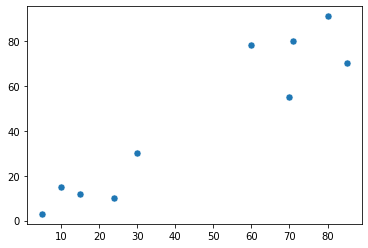

In [7]:
sns.scatterplot(x=X[:,0],y = X[:,1], s = 50)

In [11]:
#### SINGLE LINKAGE DISTANCE (MIN)

In [12]:
l = hie.linkage(X,method = "single",metric = "euclidean")

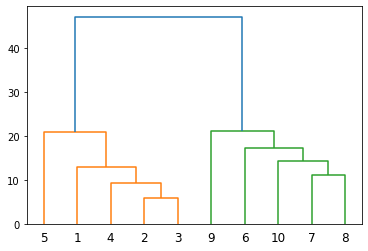

In [15]:
hie.dendrogram(l,labels = labels)
plt.show()


In [17]:
distance_four_to_two = distance.euclidean(X[3],X[1]) # distance between 4th sample to the 2nd sample


In [18]:
distance_four_to_three = distance.euclidean(X[3],X[2])

In [19]:
distancefour_tocluster2_3 = np.min([distance_four_to_two,distance_four_to_three])

In [20]:
distance_one_to_two = distance.euclidean(X[0],X[1]) 
distance_one_to_three = distance.euclidean(X[0],X[2]) 

In [21]:
distanceone_tocluster2_3 = np.min([distance_one_to_two,distance_one_to_three])
    
print("Distance between 4 and cluster (2,3) : ", distancefour_tocluster2_3)

print("Distance between 1 and cluster (2,3) : ", distanceone_tocluster2_3)

Distance between 4 and cluster (2,3) :  9.219544457292887
Distance between 1 and cluster (2,3) :  13.0


In [22]:
#### COMPLETE LINKAGE DISTANCE (MAX):

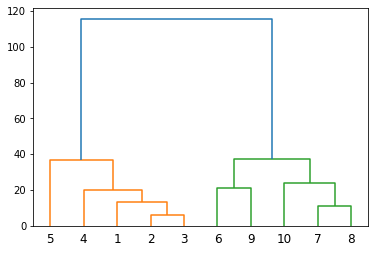

In [24]:
l = hie.linkage(X,method = "complete",metric = "euclidean")
hie.dendrogram(l,labels = labels)
plt.show()

In [25]:
#### AVERAGE LINKAGE DISTANCE :

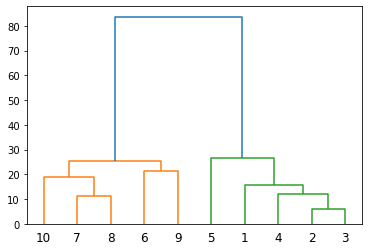

In [27]:
l = hie.linkage(X,method = "average", metric="euclidean")
hie.dendrogram(l,labels=labels)
plt.show()

In [28]:
##### SKLEARN USAGE

In [38]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean",linkage = "ward")

cluster.fit(X)

AgglomerativeClustering()

<AxesSubplot:>

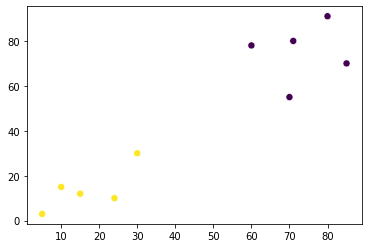

In [39]:
sns.scatterplot(x = X[:,0], y = X[:,1], s = 50, c = cluster.labels_, cmap = "viridis")